In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")



In [45]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine2)

engine2.dispose()


In [47]:

student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

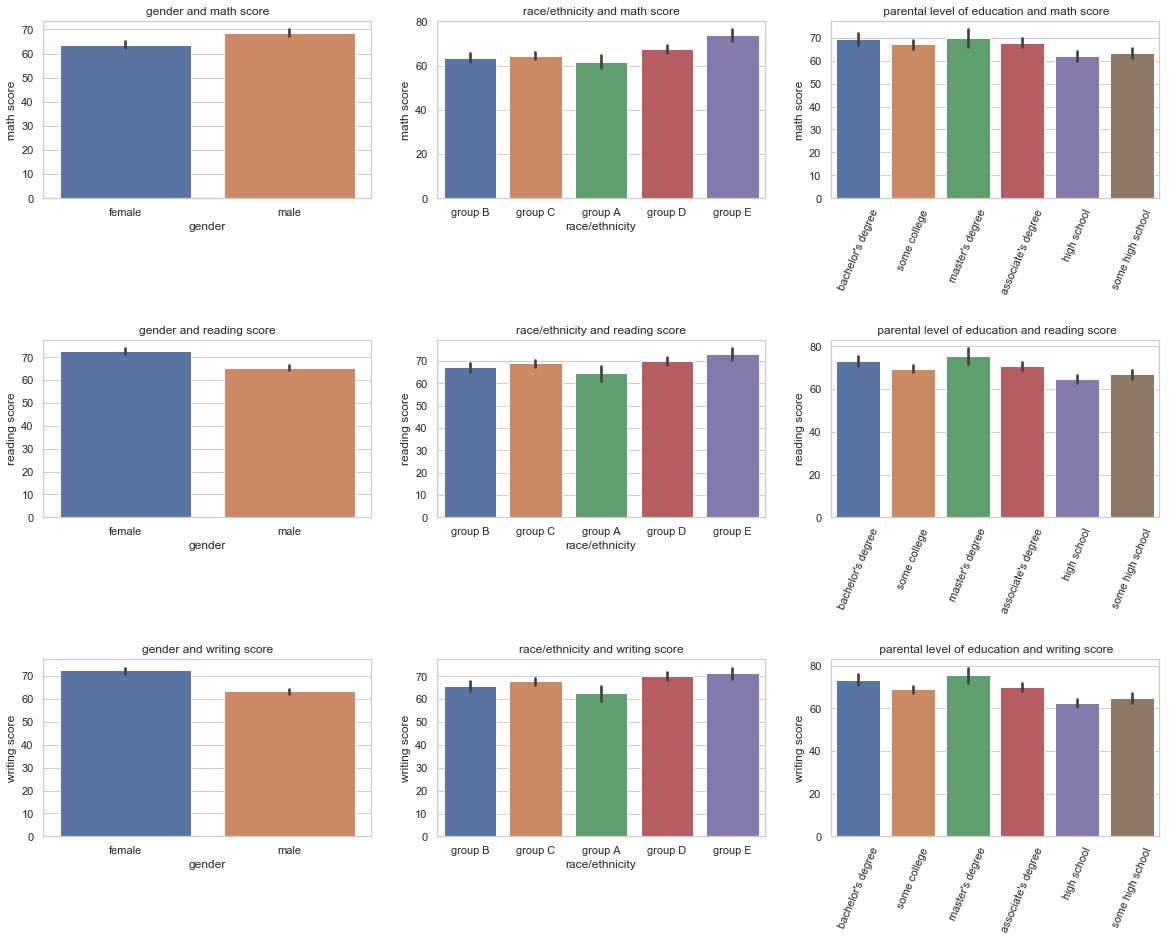

In [70]:
plt.figure(figsize=(20,15) )
plt.subplots_adjust(hspace=0.8)
plt.subplot(3,3,1)

sns.barplot(student_df["gender"], student_df["math score"])
plt.title("gender and math score")

plt.subplot(3,3,2)

sns.barplot(student_df["race/ethnicity"], student_df["math score"])
plt.title("race/ethnicity and math score")

plt.subplot(3,3,3)

sns.barplot(student_df["parental level of education"], student_df["math score"])
plt.xticks(rotation=67)
plt.xlabel('')
plt.title(" parental level of education and math score")

plt.subplot(3,3,4)

sns.barplot(student_df["gender"], student_df["reading score"])
plt.title("gender and reading score")

plt.subplot(3,3,5)

sns.barplot(student_df["race/ethnicity"], student_df["reading score"])
plt.title("race/ethnicity and reading score")

plt.subplot(3,3,6)
sns.barplot(student_df["parental level of education"], student_df["reading score"])
plt.xticks(rotation=67)
plt.xlabel('')
plt.title(" parental level of education and reading score")

plt.subplot(3,3,7)

sns.barplot(student_df["gender"], student_df["writing score"])
plt.title("gender and writing score")

plt.subplot(3,3,8)

sns.barplot(student_df["race/ethnicity"], student_df["writing score"])
plt.title("race/ethnicity and writing score")

plt.subplot(3,3,9)
sns.barplot(student_df["parental level of education"], student_df["writing score"])
plt.xticks(rotation=67)
plt.xlabel('')
plt.title(" parental level of education and writing score")

plt.show()


In [88]:
genders = student_df["gender"].unique()
grouped_gender_df = student_df.groupby("gender")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(genders)):
        for j in range(i+1, len(genders)):
            print("t-test between groups {0} and {1}:".format(genders[i], genders[j]))
            print(stats.ttest_ind(
                student_df[student_df["gender"]==genders[i]][var], 
                student_df[student_df["gender"]==genders[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


In [89]:
parents = student_df["parental level of education"].unique()
grouped_parents_df = student_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(parents)):
        for j in range(i+1, len(parents)):
            print("t-test between groups {0} and {1}:".format(parents[i], parents[j]))
            print(stats.ttest_ind(
                student_df[student_df["parental level of education"]==parents[i]][var], 
                student_df[student_df["parental level of education"]==parents[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

In [90]:
race = student_df["race/ethnicity"].unique()
grouped_race_df = student_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(race)):
        for j in range(i+1, len(race)):
            print("t-test between groups {0} and {1}:".format(race[i], race[j]))
            print(stats.ttest_ind(
                student_df[student_df["race/ethnicity"]==race[i]][var], 
                student_df[student_df["race/ethnicity"]==race[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


2.Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [76]:
student_df.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [77]:
student_df.groupby('lunch').describe()

math score                                                       \
                  count       mean        std   min   25%   50%   75%    max   
lunch                                                                          
free/reduced      355.0  58.921127  15.159956   0.0  49.0  60.0  69.0  100.0   
standard          645.0  70.034109  13.653501  19.0  61.0  69.0  80.0  100.0   

             reading score             ...              writing score  \
                     count       mean  ...   75%    max         count   
lunch                                  ...                              
free/reduced         355.0  64.653521  ...  75.0  100.0         355.0   
standard             645.0  71.654264  ...  82.0  100.0         645.0   

                                                                   
                   mean        std   min   25%   50%   75%    max  
lunch                                                              
free/reduced  63.022535  15.433823  10.0  53.0  64.0  74.0  100.0  
standard      70.823256  14.339487  22.0  62.0  72.0  81.0  100.0  

[2 rows x 24 columns]

It looks like free/reduced lunch students have lower averages than standard students. Lower scores could come 
from economical difficulties students face. 

3.Does the test preparation course seem to have an effect on the exam performances?

In [81]:
student_df.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


4.Which 2 exam scores are most correlated with each other?

In [71]:
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000
